# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [4]:
?fetch_20newsgroups

In [5]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [6]:
newsgroups_train.target_names


['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

(1) For each of the first 5 training examples, print the text of the message along with the label.

In [7]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print "Category: " + newsgroups_train.target_names[train_labels[i]]
        print ''
        print train_data[i]
        print ''
        print ''
### STUDENT END ###
P1()

Category: comp.graphics

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Category: talk.religion.misc



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.


Ca

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [8]:
def P2():
### STUDENT START ###

    #***********
    #a
    #***********

    #Initialize the vectorizer
    gen_features = CountVectorizer()

    #fit to training data
    vocab_counts = gen_features.fit_transform(train_data)
    
    print "Part A"
    
    #The size of the vocabulary is 26,879 words.
    print "The size of the vocabulary in the training data is : " + str(vocab_counts.shape[1])

    #Get count of non-zero values
    print "The number of non-zero values in the vocabulary matrix is : " + str(vocab_counts.nnz)

    #Get share of non-zero values
    print "The share of non-zero values in the vocabulary matrix is : " + \
        str(vocab_counts.nnz / (1.0 * vocab_counts.shape[0] * vocab_counts.shape[1]))

    print ""

    #***********
    #b
    #***********

    #Initialize the vectorizer
    gen_features = CountVectorizer()

    #Fit to the training data
    gen_features.fit_transform(train_data)

    print "Part B"
    
    print "The first feature by alphabetical order is: " + gen_features.get_feature_names()[0]

    print "The last feature by alphabetical order is: " + \
        gen_features.get_feature_names()[len(gen_features.get_feature_names()) - 1]

    print ""


    #***********
    #c
    #***********

    #define the vocab list we want to look at
    vocab_list = ["atheism", "graphics", "space", "religion"]

    #Initialize an instance of the vectorizer, setting the vocabulary list
    gen_features_spec_voc = CountVectorizer(vocabulary = vocab_list)

    #get counts of each word in our vocabulary list by fitting to the training data
    spec_voc_counts = gen_features_spec_voc.fit_transform(train_data)

    #check shape of the result
    spec_voc_counts.shape

    print "Part C"
    
    #Get share of non-zero values
    print "The share of non-zero values in the vocabulary matrix is : " + \
        str(spec_voc_counts.nnz / (1.0 * spec_voc_counts.shape[0] * spec_voc_counts.shape[1]))

    print ""

    #***********
    #d
    #***********

    #Initialize an instance of the vectorizer, choosing to look for two and three word features
    gen_features_ngrams = CountVectorizer(analyzer = 'word', ngram_range = (2,3))

    #fit the vectorizer to the training data
    ngram_vocab = gen_features_ngrams.fit_transform(train_data)

    print "Part D"
    
    #Getting counts of bigrams and trigrams yields a vocabulary of 510,583 ngrams
    print "Getting counts of bigrams and trigrams yields a vocabulary of size: " + str(ngram_vocab.shape[1])

    print ""

    #***********
    #e
    #***********

    #Initialize an instance of the vectorizer removing words that appear in fewer than ten documents
    gen_features_min_docs = CountVectorizer(min_df = 10)

    #fit to the training data
    pruned_vocab = gen_features_min_docs.fit_transform(train_data)

    print "Part E"
    
    print "The pruned vocabulary yields a vocabulary of size: " + str(pruned_vocab.shape[1])

    print ""

    #***********
    #f
    #***********

    #Initialize an instance of the vectorizer
    gen_features = CountVectorizer()

    #fit to the training data
    train_data_vocab = gen_features.fit_transform(train_data)

    #Get list of the feature names in training data
    train_data_features = gen_features.get_feature_names()

    #fit to the dev data
    dev_data_vocab = gen_features.fit_transform(dev_data)

    #Get list of the feature names in the dev data
    dev_data_features = gen_features.get_feature_names()

    #Find how many of the dev data vocab words are not in the training data
    overlap = len(set(train_data_features) & set(dev_data_features))

    print "Part F"
    
    print "There are " + str(len(dev_data_features) - overlap) + " vocab words that appear in the dev data and not in the training data."

### STUDENT END ###
P2()

Part A
The size of the vocabulary in the training data is : 26879
The number of non-zero values in the vocabulary matrix is : 196700
The share of non-zero values in the vocabulary matrix is : 0.00359782722696

Part B
The first feature by alphabetical order is: 00
The last feature by alphabetical order is: zyxel

Part C
The share of non-zero values in the vocabulary matrix is : 0.0671091445428

Part D
Getting counts of bigrams and trigrams yields a vocabulary of size: 510583

Part E
The pruned vocabulary yields a vocabulary of size: 3064

Part F
There are 4027 vocab words that appear in the dev data and not in the training data.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

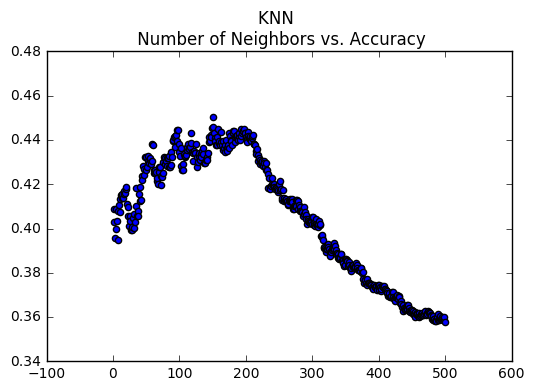

The optimal number of neighbors is: 151
The optimal alpha is: {'alpha': 0.0035999999999999999}
0.830875122911


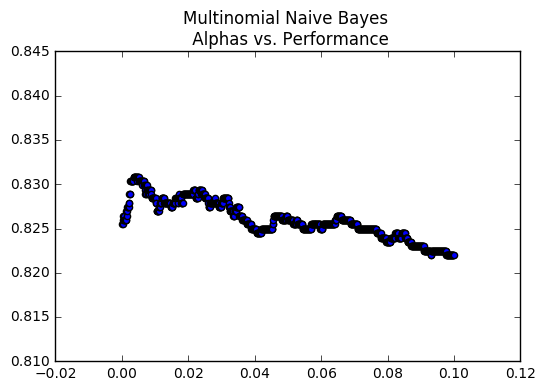

The optimal C is: {'C': 0.17000000000000001}
0.776794493609


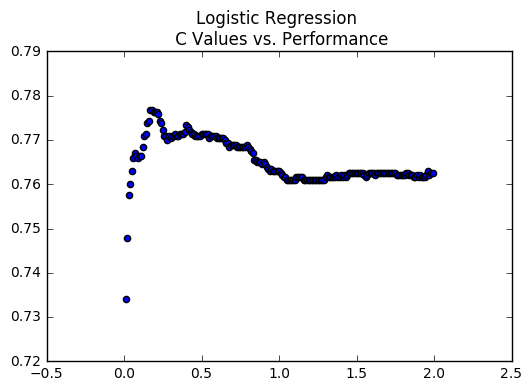

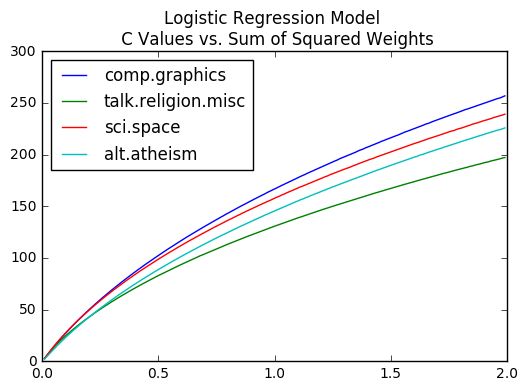

In [9]:
def P3():
### STUDENT START ###
    #***********
    #knn
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #max neighbors
    max_neighbors = 501

    #create a list of possible k values
    k_options = {'n_neighbors': range(1,max_neighbors)}

    #Instantiate a KNN classifier
    knn_ksearch = GridSearchCV(KNeighborsClassifier(), k_options)

    #fit the KNN classifier
    knn_ksearch.fit(train_data_features, train_labels)

    #Get mean scores
    grid_search_results = knn_ksearch.grid_scores_

    #Get best K value
    knn_ksearch.best_params_

    #Get mean scores
    mean_scores = []

    for i in range(0,max_neighbors-1):
        mean_scores.append(grid_search_results[i][1])


    #Plot accuracy vs. number of neighbors
    plt.scatter(range(1,max_neighbors), mean_scores)
    plt.title('KNN \n Number of Neighbors vs. Accuracy')
    plt.show()

    print 'The optimal number of neighbors is: ' + str(knn_ksearch.best_params_['n_neighbors'])

    
    #***********
    #Multinomial Naive Bayes
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #Define the alpha values we want to try
    alphas_to_try = np.arange(0.0001, 0.1, 0.0001)

    alphas = {'alpha': alphas_to_try}

    #Define the classifier
    mnb_alphasearch = GridSearchCV(MultinomialNB(), alphas)

    #fit the classifier
    mnb_alphasearch.fit(train_data_features, train_labels)

    #Get the mean scores for each alpha tried by the grid search
    alphasearch_results = mnb_alphasearch.grid_scores_

    #Get mean scores
    mean_scores = []

    for i in range(0,len(alphas_to_try)):
        mean_scores.append(alphasearch_results[i][1])


    #return the model fit
    print 'The optimal alpha is: ' + str(mnb_alphasearch.best_params_)
    print mnb_alphasearch.best_score_

    #plot alphas against performance
    plt.scatter(alphas_to_try, mean_scores)
    plt.title('Multinomial Naive Bayes \n Alphas vs. Performance')
    plt.show()

    
    #***********
    #Logistic Regression
    #***********

    #Instantiate an instance of the vectorizer
    gen_features = CountVectorizer()

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #Define a list of the c values to try
    c_vals_to_try = np.arange(0.01,2,0.01)

    c_vals = {'C': c_vals_to_try}

    #Instantiate an instance of the logistic regression classifier
    logr_Csearch = GridSearchCV(LogisticRegression(), c_vals)

    #fit the model
    logr_Csearch.fit(train_data_features, train_labels)

    #Get the mean scores
    Csearch_results = logr_Csearch.grid_scores_

    mean_scores = []

    for i in range(0,len(c_vals_to_try)):
        mean_scores.append(Csearch_results[i][1])

    #return the model fit
    print 'The optimal C is: ' + str(logr_Csearch.best_params_)
    print logr_Csearch.best_score_

    #plot c values against performance
    plt.scatter(c_vals_to_try, mean_scores)
    plt.title('Logistic Regression \n C Values vs. Performance')
    plt.show()
    
    #Part c - characteristics as C changes
    weight_vals_sum_sq = []

    #loop through C values
    for c in c_vals_to_try:

        #Instantiate a logistic regression estimator
        logReg = LogisticRegression(C = c)

        #Fit the model to the training data
        logReg.fit(train_data_features, train_labels)

        #Get the sum of squared weight values for each class
        sum_sq = np.sum(logReg.coef_ ** 2, axis = 1)

        #Append sums to list to store
        weight_vals_sum_sq.append(sum_sq)

    #Get labels of each category
    legend_labels = []

    for i in np.unique(train_labels):
        legend_labels.append(newsgroups_train.target_names[train_labels[i]])

    #Plot C values against sum of squared weights
    plt.plot(c_vals_to_try, weight_vals_sum_sq)
    plt.title("Logistic Regression Model \n C Values vs. Sum of Squared Weights")
    plt.legend(legend_labels, loc = 'best')
    plt.show()

### STUDENT END ###
P3()

In [10]:
GridSearchCV?

ANSWER:

Part a  
KNN does not perform well for this example because of the curse of dimensionality. In essence, with so many features, all training examples are far away.

Part b  
Logistic regression may not perform as well as Naive Bayes because the cost function hyper plane has many many local minima. The reason the cost function hyper plan has so many local minima is because the feature space is so large, and the features are binary. This means that Logistic regression will have a difficult time finding the parameters that truly minimize the cost function.

Part c  
As shown in the chart above we increase the C parameter, the sum of the squared weights for each parameter increases at a seemingly logarithmic rate.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

# HOW DO WE KNOW WHICH ROW IN THE COEF_ MATRIX CORRESPONDS TO WHICH CATEGORY?

In [11]:
def P4():
### STUDENT START ###
    
    #define function that takes as its argument the number of words to include in each feature and returns
    #a dataframe that shows the weights for each of the top five most important features for each target label
    def get_top_features(ngram_range_tuple):
        #Instantiate an instance of the vectorizer
        gen_features = CountVectorizer(ngram_range = (ngram_range_tuple))

        #generate a feature matrix for the training data
        train_data_features = gen_features.fit_transform(train_data)

        #get the vocabulary
        feature_vocab = gen_features.vocabulary_
        feature_vocab = {y:x for x,y in feature_vocab.iteritems()}

        #instantiate the logistic regression classifier using the optimal C from question 3 above
        lgr = LogisticRegression(C = .17)

        #fit the model to the training data
        lgr.fit(train_data_features, train_labels)

        #get the weights for each feature
        feature_weights = lgr.coef_

        #sort the array and get the indices of the features with the greatest weights
        sorted_weights = np.argsort(feature_weights, axis = 1)

        #get the five most important features for each class
        important_feature_indxs = sorted_weights[:,-5:]

        #reshape
        important_feature_indxs = important_feature_indxs.reshape(20,1)

        #convert to list
        index_list = important_feature_indxs.flatten().tolist()

        #get the words corresponding to these features
        important_features = [feature_vocab[x] for x in index_list]

        #construct a dataframe where we will store the weights for the top 20 features
        important_feature_df = pd.DataFrame()
        important_feature_df['features'] = important_features
        important_feature_df['indexes_for_weights'] = index_list

        #now get the features' weights for each category
        for cat in newsgroups_train.target_names:
            #create new column for each category
            important_feature_df[cat] = np.zeros(20)
            #loop through the imporant features and populate columns with each feature's weight for that category
            for i in important_feature_df['indexes_for_weights']:
                i_index = important_feature_df[important_feature_df['indexes_for_weights'] == i].index
                important_feature_df.set_value(i_index, cat, feature_weights[newsgroups_train.target_names.index(cat)][i])

        return important_feature_df
    
    #call function to get the top features for one and two word features
    single_word_top_features = get_top_features((1,1))
    bigram_top_features = get_top_features((2,2))
    one_to_three_word_top_features = get_top_features((1,3))
    
    print "Most important single word features and weights for each category"
    display(single_word_top_features)

    print "Most important bigram features and weights for each category"
    display(bigram_top_features)
    
    print "Most important one to three word features and weights for each category"
    display(one_to_three_word_top_features)
    
### STUDENT END ###
P4()

Most important single word features and weights for each category


,features,indexes_for_weights,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,islam,13668,0.503532,-0.092138,-0.201126,-0.202588
1,atheists,3870,0.570129,-0.085423,-0.191865,-0.388189
2,bobby,4784,0.585119,-0.143680,-0.204601,-0.277213
3,religion,20430,0.585700,-0.360834,-0.473835,-0.013805
4,atheism,3866,0.586190,-0.252765,-0.249924,-0.301961
5,computer,6555,-0.014678,0.650611,-0.402955,-0.277547
6,3d,1145,-0.219865,0.670749,-0.388907,-0.224030
7,file,10376,-0.204746,0.767173,-0.502779,-0.351613
8,image,12769,-0.322306,0.786130,-0.457730,-0.264118
9,graphics,11552,-0.480705,1.194378,-0.785004,-0.446572


Most important bigram features and weights for each category


,features,indexes_for_weights,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,are you,20596,0.332870,-0.176018,-0.083970,-0.194365
1,is not,88101,0.340000,-0.170050,-0.332193,0.033586
2,in this,83190,0.347179,-0.014736,-0.353034,-0.080633
3,claim that,38326,0.373716,-0.128641,-0.177610,-0.076589
4,cheers kent,37174,0.394066,-0.463679,-0.447931,0.402861
5,comp graphics,40451,-0.190308,0.496922,-0.251040,-0.167065
6,is there,88596,-0.224894,0.519616,-0.332730,-0.158749
7,out there,123709,-0.205969,0.555659,-0.337721,-0.198758
8,in advance,81950,-0.337850,0.622689,-0.312550,-0.298197
9,looking for,98723,-0.458900,0.805137,-0.353409,-0.400985


Most important one to three word features and weights for each category


,features,indexes_for_weights,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,atheists,64277,0.314938,-0.066497,-0.104680,-0.176307
1,deletion,127514,0.315154,-0.110840,-0.112674,-0.110214
2,islam,238813,0.321529,-0.062245,-0.113439,-0.131111
3,atheism,63811,0.380793,-0.144079,-0.146451,-0.158592
4,religion,375183,0.430239,-0.235884,-0.292772,0.017999
5,3d,10863,-0.139887,0.419676,-0.241451,-0.138024
6,files,164415,-0.232292,0.430118,-0.184437,-0.244791
7,image,214419,-0.211390,0.530575,-0.296373,-0.194827
8,file,164005,-0.165704,0.554959,-0.355033,-0.246439
9,graphics,190555,-0.346233,0.890854,-0.556457,-0.319916


ANSWER:  

The most surprising results are in the bi-gram feature table where many of the most important features appear quite generic suh as 'it was', 'and such, or 'with you'. It is surprising that such generic features can be the most important in identifying news articles for these categories. My intuition says that for a feature to be important in the model, it must appear across a large number of examples of a given category. When we use features that are composed of two words, it becomes less likely that a non-generic string of two words will appear in enough examples of a given target category to be deemed one of the most important features. By contrast, it should not surprise us that generic phrases appear in many examples of a given target class which is why they end up being the most important in defining that target class.  

Interestingly, if we allow for features to be anywhere from one to three words long, all of the most important features end up being single words.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [12]:
#remove a single regular expression
test = train_data[4]

#initialize the regular expression
p = re.compile('lunar', re.IGNORECASE)

#feed the blurb to the regular expression
#the .sub method will substitute the first argument for any strings matching the regular expression
p.sub('', test)

u'AW&ST  had a brief blurb on a Manned  Exploration confernce\nMay 7th  at Crystal City Virginia, under the auspices of AIAA.\n\nDoes anyone know more about this?  How much, to attend????\n\nAnyone want to go?'

In [13]:
#remove non alphanumeric characters
test = train_data[4]

#initialize the regular expression
p = re.compile('([^\s\w]|_)+', re.IGNORECASE)

#feed the blurb to the regular expression, removing all non-whitespace characters
p.sub("", test)


u'AWST  had a brief blurb on a Manned Lunar Exploration confernce\nMay 7th  at Crystal City Virginia under the auspices of AIAA\n\nDoes anyone know more about this  How much to attend\n\nAnyone want to go'

In [14]:
#remove a list of regular expressions
test = train_data[4]

#initialize the regular expression
#p = re.compile('lunar|7th|Crystal|Anyone', re.IGNORECASE)

test_list = ['lunar', 'crystal', 'anyone']

#loop through the list of regular expressions, replacing each in the target: test.
for item in test_list:
    p = re.compile(item, re.IGNORECASE)
    test = p.sub('', test)

test = test.lower()

test

u'aw&st  had a brief blurb on a manned  exploration confernce\nmay 7th  at  city virginia, under the auspices of aiaa.\n\ndoes  know more about this?  how much, to attend????\n\n want to go?'

# NOTE:

Helpful ideas for improving pre-processor
https://www.analyticsvidhya.com/blog/2015/10/6-practices-enhance-performance-text-classification-model/

In [31]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    
### STUDENT START ###

    #*****
    #convert everything to lower case
    s = s.lower()
    
    #*****
    #remove non alphanumeric characters
    #initialize the regular expression
    p = re.compile('([^\s\w]|_)+', re.IGNORECASE)

    #remove all non-alphanumeric characters
    s = p.sub("", s)
    
    #*****
    #remove suffixes followed by non alphanumeric characters
    suffix_list = ['ing+\W', 'ly+\W', 's+\W', 'es+\W', 'ed+\W']

    #loop through the suffixes we want to remove and remove them from the blurb
    for item in suffix_list:
        p = re.compile(item, re.IGNORECASE)
        s = p.sub(' ', s)
     
    #*****
    #remove digits
    p = re.compile('\d', re.IGNORECASE)
    s = p.sub('', s)
    
    #*****

    #remove single character features
    p = re.compile(r'\b\w{,1}\b', re.IGNORECASE)
    s = p.sub('', s)
      
    #remove multiple spaces in a row
    p = re.compile(' +')
    s = p.sub(' ',s)
    
    return s
        
### STUDENT END ###

#define a function to get the n least important features

def get_n_unimp_features(n, vectorizer_obj, lgr_model):

    #get the vocabulary
    feature_vocab = vectorizer_obj.vocabulary_
    feature_vocab = {y:x for x,y in feature_vocab.iteritems()}

    #get the weights for each feature
    feature_weights = abs(lgr_model.coef_)

    #sort the array and get the indices of the features with the smallest weights
    sorted_weights = np.argsort(feature_weights, axis = 1)

    #get the five most important features for each class
    unimp_feature_indxs = sorted_weights[:,:n/4]

    #reshape
    unimp_feature_indxs = unimp_feature_indxs.reshape(n,1)

    #convert to list
    index_list = unimp_feature_indxs.flatten().tolist()

    #get the words corresponding to these features
    unimp_features = [feature_vocab[x] for x in index_list]

    unimp_features_df = pd.DataFrame()
    unimp_features_df['features'] = unimp_features
    unimp_features_df['indexes_for_weights'] = index_list

    #now get the features' weights for each category
    for cat in newsgroups_train.target_names:
        #create new column for each category
        unimp_features_df[cat] = np.zeros(n)
        #loop through the imporant features and populate columns with each feature's weight for that category
        for i in unimp_features_df['indexes_for_weights']:
            i_index = unimp_features_df[unimp_features_df['indexes_for_weights'] == i].index
            unimp_features_df.set_value(i_index, cat, feature_weights[newsgroups_train.target_names.index(cat)][i])

    return unimp_features_df

def P5():
### STUDENT START ###

    #**************
    #Section with no preprocessing
    #**************
    
    #instantiate an instance of the vectorizer
    gen_features = CountVectorizer(preprocessor = empty_preprocessor)

    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #generate feature matrix for the development data
    dev_data_features = gen_features.transform(dev_data)

    
    #instantiate the logistic regression classifier using the optimal C from question 3 above
    lgr = LogisticRegression(C = .17)

    #fit the model to the training data
    lgr.fit(train_data_features, train_labels)

    #predict the dev data
    preds = lgr.predict(dev_data_features)

    #get f1 score
    no_preprocessing_f1 = metrics.f1_score(dev_labels, preds, average = 'weighted' )

    #print the result
    print "The size of the vocabulary with no preprocessing is: " + str(train_data_features.shape[1])
    print "The F1 score with no preprocessing is: " + str(round(no_preprocessing_f1, 3))

    
    #**************
    #Section with preprocessing
    #**************
        
    #Instantiate an instance of the vectorizer specifying the better preprocessor defined above
    gen_features = CountVectorizer(preprocessor = better_preprocessor, stop_words = 'english')
  
    #generate a feature matrix for the training data
    train_data_features = gen_features.fit_transform(train_data)

    #generate a feature matrix for the development data
    dev_data_features = gen_features.transform(dev_data)
    
    #instantiate the logistic regression classifier using the optimal C from question 3 above
    lgr = LogisticRegression(C = .17)

    #fit the model to the training data
    lgr.fit(train_data_features, train_labels)

    #predict the dev data
    preds = lgr.predict(dev_data_features)

    #get f1 score
    preprocessing_f1 = metrics.f1_score(dev_labels, preds, average = 'weighted' )

    #print the result
    print "The size of the vocabulary WITH preprocessing is: " + str(train_data_features.shape[1])
    print "The F1 score WITH preprocessing is: " + str(round(preprocessing_f1, 3))

    least_important_features = get_n_unimp_features(n = 60, vectorizer_obj = gen_features, lgr_model = lgr)
    print "Least important features: "
    display(least_important_features)

### STUDENT END ###
P5()

The size of the vocabulary with no preprocessing is: 33291
The F1 score with no preprocessing is: 0.705
The size of the vocabulary WITH preprocessing is: 21748
The F1 score WITH preprocessing is: 0.732
Least important features: 


,features,indexes_for_weights,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,ibid,8882,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
1,doeth,5363,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
2,titu,19563,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
3,worketh,21363,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
4,uncreat,20129,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
5,fornication,7084,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
6,interpetation,9595,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
7,bestow,1954,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
8,subtilty,18664,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08
9,evince,6303,3.712272e-10,1.906809e-06,2.424714e-08,1.958536e-08


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

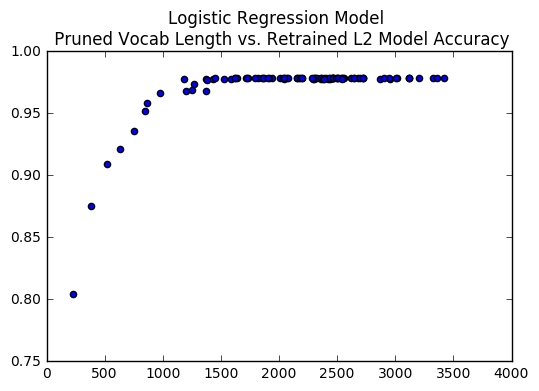

In [32]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    #define a range of c values to try
    c_vals_to_try = np.arange(.1,10,.1).tolist()

    #instantiate one list to hold the vocabulary length after pruning and one to hold the accuracy of the retrained L2 model
    pruned_vocab_lengths = []
    L2_accuracies = []


    for c_val in c_vals_to_try:
        #instantiate an instance of the vectorizer
        gen_features = CountVectorizer(preprocessor = empty_preprocessor)

        #generate a feature matrix for the training data
        train_data_features = gen_features.fit_transform(train_data)

        #generate a feature matrix for the development data
        dev_data_features = gen_features.transform(dev_data)

        #instantiate a logistic regression classifier using L1 regularization
        lgr_l1 = LogisticRegression(penalty = 'l1', C = c_val, tol = .01)

        #fit the model
        lgr_l1.fit(train_data_features, train_labels)

        #get the accuracy of the model on the training and development data.
        l1_score_training = lgr_l1.score(train_data_features, train_labels)
        l1_score_dev = lgr_l1.score(dev_data_features, dev_labels)

        #get the coefficients
        weights = lgr_l1.coef_

        #get sum of weights across features to identify features with zero weights
        sum_weights = np.sum(weights, axis = 0)

        #get indices of non-zero features
        non_zero_feature_weights = np.nonzero(sum_weights)

        #limit the feature matrix to the words with non-zero weights
        train_data_features_limit = train_data_features[:,non_zero_feature_weights[0]]

        #get the length of the new vocabulary
        new_vocab_length = train_data_features_limit.shape[1]

        #*********
        #train a new logistic regression using L2 regularization with the limited set of features
        #instantiate a new classifier
        lgr_l2 = LogisticRegression(C = c_val, tol = 0.01)

        #fit the model that uses L2 regularization using the limited feature set
        lgr_l2.fit(train_data_features_limit, train_labels)

        #get the accuracy of the retrained model
        l2_score_train = lgr_l2.score(train_data_features_limit, train_labels)

        #append results to the blank lists we created earlier.
        pruned_vocab_lengths.append(new_vocab_length)
        L2_accuracies.append(l2_score_train)


    plt.scatter(pruned_vocab_lengths, L2_accuracies)
    plt.title("Logistic Regression Model \n Pruned Vocab Length vs. Retrained L2 Model Accuracy")
    plt.show()

    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [33]:
def P7():
### STUDENT START ###
    #instantiate one instance of both the count and  tfidf vectorizers
    gen_tfidf = TfidfVectorizer()

    #fit the vectorizer to the training data
    train_data_features_tfidf = gen_tfidf.fit_transform(train_data)

    #vectorize the dev data
    dev_data_features_tfidf = gen_tfidf.transform(dev_data)

    #instantiate a logistic regression classifier, setting C equal to 100.
    lgr = LogisticRegression(C = 100)

    #train this model on the training data that we vectorized above
    lgr.fit(train_data_features_tfidf, train_labels)

    #predict the labels of the dev data
    predicted_probs = lgr.predict_proba(dev_data_features_tfidf)
    predictions = lgr.predict(dev_data_features_tfidf)

    #convert to dataframe
    predicted_probs_df = pd.DataFrame(predicted_probs)

    #Add columns with the actual and predicted labels
    predicted_probs_df['actual_label'] = dev_labels
    predicted_probs_df['predicted_label'] = predictions


    #create crosswalk mapping the target numbers to the target labels.
    target_label_crosswalk = {0:newsgroups_train.target_names[0], 1:newsgroups_train.target_names[1], \
                 2:newsgroups_train.target_names[2], 3:newsgroups_train.target_names[3]}

    #rename columns with the target names instead of numbers
    predicted_probs_df.rename(columns = target_label_crosswalk, inplace = True)


    #flag incorrect predictions
    predicted_probs_df['flag_incorrect'] = predicted_probs_df.apply(lambda row:\
                                                                    1 if row['actual_label'] != row['predicted_label']\
                                                                    else 0, axis = 1)

    #Get a dataframe with only incorrect predictions
    wrong_preds_df = predicted_probs_df[predicted_probs_df['flag_incorrect'] == 1]

    #create column showing the ratio of the predicted probability of the predicted to the actual label
    wrong_preds_df['R_ratio'] = wrong_preds_df.apply(lambda row: row[int(row['predicted_label'])] / row[int(row['actual_label'])], axis = 1)

    #replace the numerical labels with the string labels
    wrong_preds_df['actual_label'] = predicted_probs_df.apply(lambda row: target_label_crosswalk[row['actual_label']], axis = 1)
    wrong_preds_df['predicted_label'] = predicted_probs_df.apply(lambda row: target_label_crosswalk[row['predicted_label']], axis = 1)

    #sort the dataframe in order of the R ratios
    wrong_preds_df = wrong_preds_df.sort(columns = 'R_ratio', ascending = False)

    #get the indices of the wrong predictions sorted in descending order of the R ratio
    wrong_preds_indices = wrong_preds_df.index
    print wrong_preds_indices[0]


    #print out the raw text for the three worst predictions
    for i in [0, 1, 2]:
        print "Actual Category: " + wrong_preds_df.iloc[i]['actual_label']
        print ''
        print "Predicted Category: " + wrong_preds_df.iloc[i]['predicted_label']
        print ''
        print dev_data[wrong_preds_indices[i]]
        print ''

## STUDENT END ###
P7()

215
Actual Category: talk.religion.misc

Predicted Category: comp.graphics

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this book. Se

/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

ANSWER:  

The TfidfVectorizer differs from the CountVectorizer in that it generates a Term-Frequency Inverse Document Frequency  matrix. This is in contrast to CountVectorizer which simply creates a matrix that counts the frequency of each feature in each of the document types.  

From the three examples where the predicted category was incorrect that had the highest ratio of the highest predicted probability to the predicted probability of the actual label, there seems to be a pattern of the model mis-classifying some articles with the true classification 'talk.religion.misc' as 'comp.graphics'. Both of these examples discuss the Book of Mormon (likely the reason for the true classification of 'talk.religion.misc') and FTP (likely the reason for the model's classification of 'comp.graphics'). There are two potential solutions to this particular mistake. First, we could automatically set the prediction for any document that mentions the word 'Mormon' to 'talk.religion.misc'. Second, we could remove the word 'FTP' from the raw documents in a pre-processing step.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [92]:
def P8():

    #vectorize the training and development data
    #instantiate an instance of the vectorizer
    #instantiate one instance of both the count and  tfidf vectorizers
    gen_tfidf = TfidfVectorizer()

    #fit the vectorizer to the training data
    train_data_features_tfidf = gen_tfidf.fit_transform(train_data)

    #generate a feature matrix for the development data
    dev_data_features_tfidf = gen_tfidf.transform(dev_data)

    #Get list of features
    features_tfidf_list = gen_tfidf.get_feature_names()

    #Get index of the feature mormon
    mormon_index = features_tfidf_list.index('mormon')

    #fit logistic regression model on the training data
    #instantiate a logistic regression classifier, setting C equal to 100.
    lgr = LogisticRegression(C = 100)

    #train this model on the training data that we vectorized above
    lgr.fit(train_data_features_tfidf, train_labels)

    #predict the labels of the dev data
    predicted_probs = lgr.predict_proba(dev_data_features_tfidf)
    predictions = lgr.predict(dev_data_features_tfidf)

    #Get score before correcting for Mormon
    f1_bf_mormon_correction = metrics.f1_score(dev_labels, predictions, average = 'weighted' )

    print('F1 Score Before Correcting Predictions of Examples Containing the Word Mormon: ' + str(round(f1_bf_mormon_correction, 4)))

    #Change predictions if the feature 'mormon' is non-zero
    for i in range(len(predictions)):   
        if dev_data_features_tfidf[i, mormon_index] != 0:
            predictions[i] = 3

    #Get score before correcting for Mormon
    f1_after_mormon_correction = metrics.f1_score(dev_labels, predictions, average = 'weighted' )

    print('F1 Score AFTER Correcting Predictions of Examples Containing the Word Mormon: ' + str(round(f1_after_mormon_correction, 4)))
    

P8()

F1 Score Before Correcting Predictions of Examples Containing the Word Mormon: 0.7598
F1 Score AFTER Correcting Predictions of Examples Containing the Word Mormon: 0.7661
